# Dataset
MINST 데이터 셋을 이용하여 손글씨 데이터 셋을 불러옵니다.

In [21]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


실제 데이터 셋에 어떤 형식으로 들어가 있는지 간단하게 확인해 봅시다

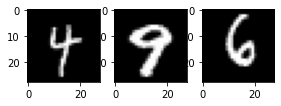

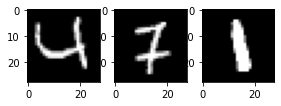

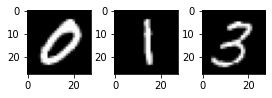

In [22]:
import matplotlib.pyplot as plt
import random
for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)],cmap="gray")
    plt.show()

데이터를 학습할 수 있는 형태로 변형시켜 줍니다

In [23]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1,28,28,1)/255.
x_test = x_test.reshape(-1,28,28,1)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D

#모델 생성

In [25]:
model = Sequential()
model.add(Conv2D(32,(2,2),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

#모델 학습


In [26]:
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=256)

Epoch 1/30
235/235 [==============================] - 8s 29ms/step - loss: 0.1293 - acc: 0.9592 - val_loss: 2.9682 - val_acc: 0.3264
Epoch 2/30
235/235 [==============================] - 7s 30ms/step - loss: 0.0306 - acc: 0.9905 - val_loss: 0.1114 - val_acc: 0.9657
Epoch 3/30
235/235 [==============================] - 7s 28ms/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0504 - val_acc: 0.9840
Epoch 4/30
235/235 [==============================] - 7s 28ms/step - loss: 0.0125 - acc: 0.9963 - val_loss: 0.0396 - val_acc: 0.9894
Epoch 5/30
235/235 [==============================] - 7s 29ms/step - loss: 0.0097 - acc: 0.9967 - val_loss: 0.0442 - val_acc: 0.9884
Epoch 6/30
235/235 [==============================] - 7s 28ms/step - loss: 0.0091 - acc: 0.9966 - val_loss: 0.0392 - val_acc: 0.9893
Epoch 7/30
235/235 [==============================] - 7s 28ms/step - loss: 0.0080 - acc: 0.9973 - val_loss: 0.0599 - val_acc: 0.9862
Epoch 8/30
235/235 [==============================] - 7s 28ms/step - 

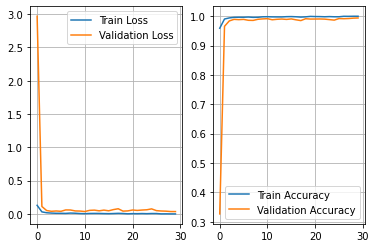

In [27]:
loss = history.history["loss"]
acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
plt.subplot(1,2,1)
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

In [28]:
index =random.randint(0,9999)
img = x_test[index].reshape(28,28)
img.shape

(28, 28)

Actual : 6	Predict : 6


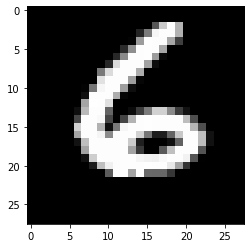

In [29]:
index =random.randint(0,9999)
plt.imshow(x_test[index].reshape(28,28), cmap="gray") 
predict = model.predict(x_test[index].reshape(1,28,28,1))
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[index]),np.argmax(predict)),)

# 틀린 문제 확인

In [30]:
wrong_index_list=[]
predict = model.predict(x_test)
for index in range(10000):
    if np.argmax(y_test[index]) != np.argmax(predict[index]):
        wrong_index_list.append(index)
print(wrong_index_list)
print("총 틀린 갯수 : ",len(wrong_index_list))

[115, 247, 321, 340, 445, 582, 659, 716, 939, 947, 1014, 1039, 1114, 1226, 1232, 1242, 1247, 1414, 1530, 1709, 1901, 2035, 2130, 2293, 2414, 2462, 2488, 2597, 2654, 2896, 2921, 3073, 3225, 3422, 3520, 3727, 3808, 3926, 3941, 4176, 4199, 4205, 4248, 4571, 4740, 4823, 4860, 5937, 6597, 6625, 7235, 7545, 8325, 8527, 9009, 9015, 9642, 9729, 9770]
총 틀린 갯수 :  59


Actual : 9	Predict : 0


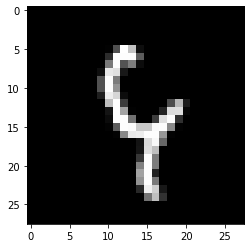

In [31]:
new_index = random.choice(wrong_index_list)
plt.imshow(x_test[new_index].reshape(28,28),cmap="gray")
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[new_index]),np.argmax(new_index)),)

# 아래 부분은 추가적인 수행부분입니다!

In [32]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
imgfile = "/content/gdrive/My Drive/3.png"
img = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)
img = 255 - img
cv2_imshow(img)

Predict : 3


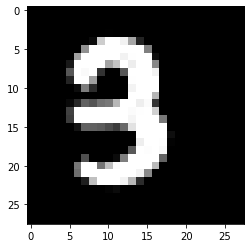

In [34]:
plt.imshow(img, cmap="gray") 
predict = model.predict(img.reshape(1,28,28,1))
print("Predict : {}".format(np.argmax(predict)),)

아래의 블로그를 참고하여 작성하였습니다.

https://suhyun72.tistory.com/entry/Keras-MNIST-%EC%98%88%EC%A0%9C%EC%BD%94%EB%93%9C